In [ ]:
# AIML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

In [ ]:


file_path = "/content/diebetes.csv"

# Read CSV into DataFrame
df = pd.read_csv(file_path)

# Display first few rows

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


## **missing value,duplicates handling**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

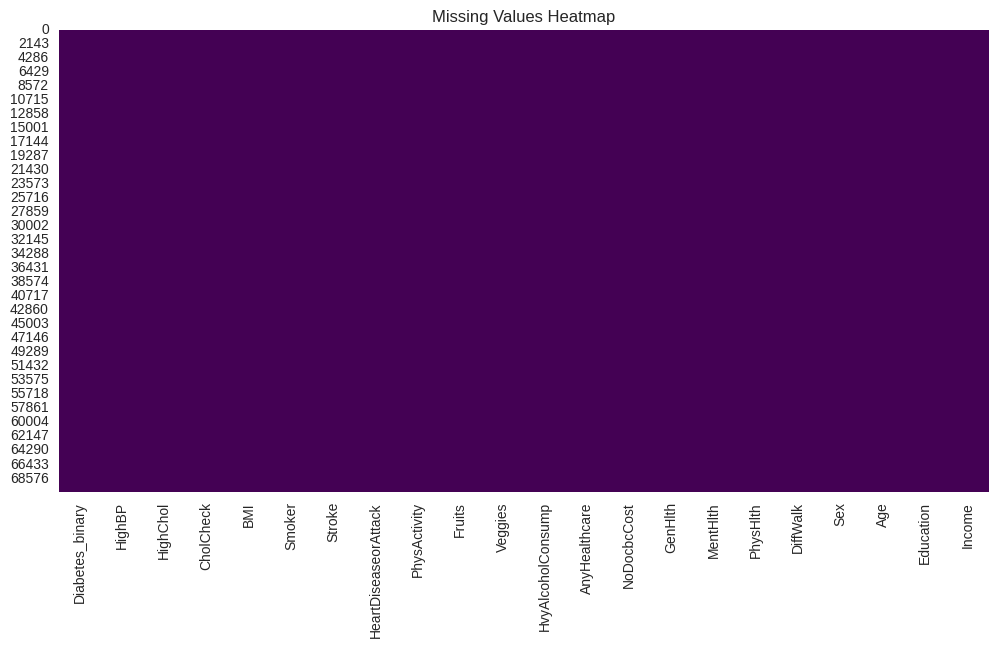

In [ ]:
df.info()     # Data types & null values
df.describe() # Basic statistics
missing_counts = df.isnull().sum()
print(missing_counts)

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# No missing value

In [ ]:
# duplicates handling

In [ ]:
# Count total duplicate rows
duplicates = df.duplicated().sum()
print("Total duplicate rows:", duplicates)

Total duplicate rows: 1635


In [ ]:
# Original row count
original_rows = df.shape[0]

# Remove duplicates
df = df.drop_duplicates()

# New row count
new_rows = df.shape[0]

print("Original rows:", original_rows)
print("After removing duplicates:", new_rows)


Original rows: 70692
After removing duplicates: 69057


In [ ]:
# Already encoded

## **Outliers handling**

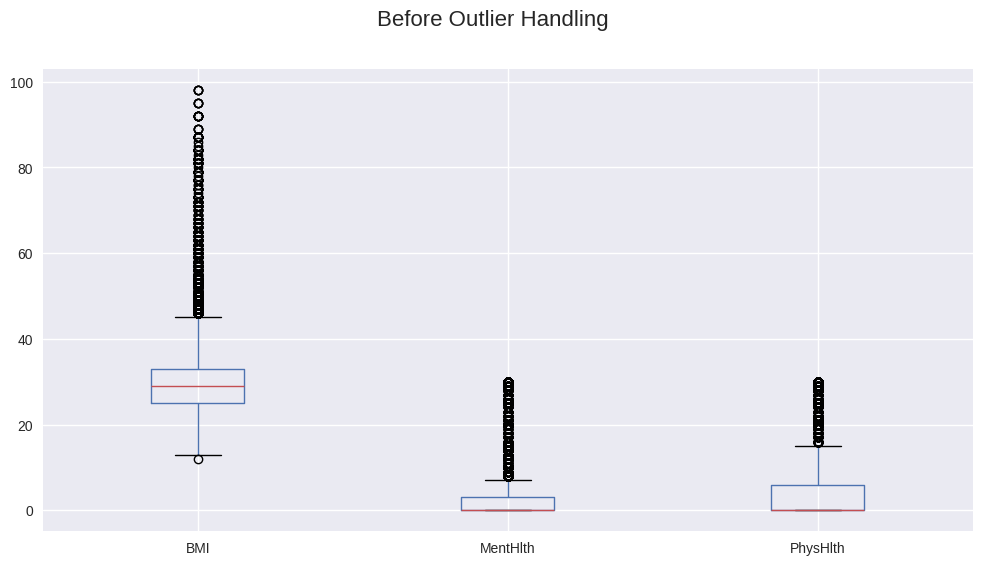

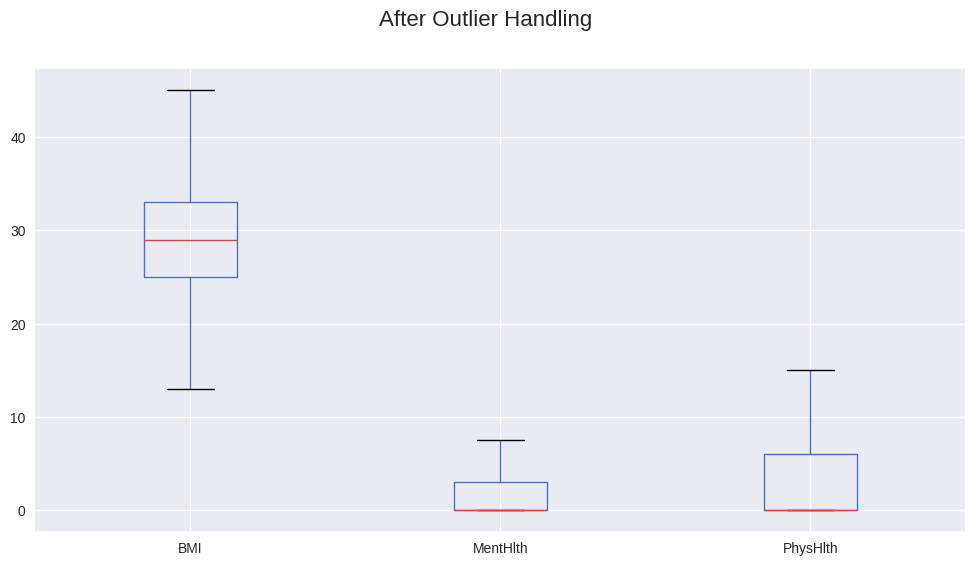

In [ ]:
# This is especially common in skewed data like MentHlth and PhysHlth, where most people are at 0.
# Even a value like 10 days will keep being flagged as an “outlier” no matter how many you remove.
# Values near 30 are valid, but they may look like “outliers” statistically, because most people report 0 or just a few days.
# we use capping because Can't remove high values like 25 or 30 — they’re valid health reports.

#  independent copy

df = df.copy()


# Convert numeric columns to float

numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']
df[numeric_cols] = df[numeric_cols].astype(float)


# Plot Before Outlier Handling

plt.figure(figsize=(12,6))
plt.suptitle("Before Outlier Handling", fontsize=16)
df [numeric_cols].boxplot()
plt.show()


# Outlier Handling (IQR Method)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap outliers
    df.loc[:, col] = df[col].clip(lower, upper)


# Plot After Outlier Handling

plt.figure(figsize=(12,6))
plt.suptitle("After Outlier Handling", fontsize=16)
df[numeric_cols].boxplot()
plt.show()




In [ ]:
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26.0,0,0,0,1,0,...,1,0,3,5.0,15.0,0,1,4,6,8
1,0,1,1,1,26.0,1,1,0,0,1,...,1,0,3,0.0,0.0,0,1,12,6,8
2,0,0,0,1,26.0,0,0,0,1,1,...,1,0,1,0.0,10.0,0,1,13,6,8
3,0,1,1,1,28.0,1,0,0,1,1,...,1,0,3,0.0,3.0,0,1,11,6,8
4,0,0,0,1,29.0,1,0,0,1,1,...,1,0,2,0.0,0.0,0,0,8,5,8


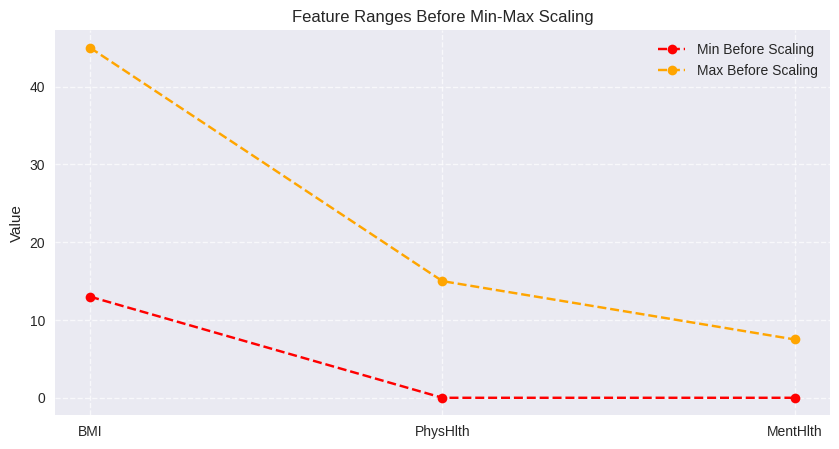

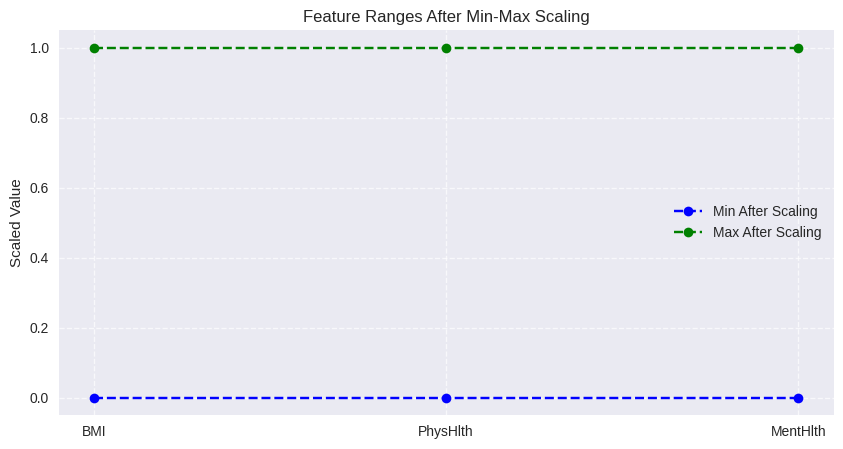

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Ensure df is a DataFrame
if not isinstance(df, pd.DataFrame):
    df = pd.DataFrame(df)

# Columns to scale
cols_to_scale = ['BMI', 'PhysHlth', 'MentHlth']

# Save min/max before scaling (only for selected columns)
min_before = df[cols_to_scale].min()
max_before = df[cols_to_scale].max()

# Plot before scaling
plt.figure(figsize=(10,5))
plt.plot(cols_to_scale, min_before.values, marker='o', linestyle='--', color='red', label='Min Before Scaling')
plt.plot(cols_to_scale, max_before.values, marker='o', linestyle='--', color='orange', label='Max Before Scaling')
plt.ylabel('Value')
plt.title('Feature Ranges Before Min-Max Scaling')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Apply MinMaxScaler only to selected columns
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Save min/max after scaling
min_after = df[cols_to_scale].min()
max_after = df[cols_to_scale].max()

# Plot after scaling
plt.figure(figsize=(10,5))
plt.plot(cols_to_scale, min_after.values, marker='o', linestyle='--', color='blue', label='Min After Scaling')
plt.plot(cols_to_scale, max_after.values, marker='o', linestyle='--', color='green', label='Max After Scaling')
plt.ylabel('Scaled Value')
plt.title('Feature Ranges After Min-Max Scaling')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [ ]:
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,0.40625,0,0,0,1,0,...,1,0,3,0.666667,1.000000,0,1,4,6,8
1,0,1,1,1,0.40625,1,1,0,0,1,...,1,0,3,0.000000,0.000000,0,1,12,6,8
2,0,0,0,1,0.40625,0,0,0,1,1,...,1,0,1,0.000000,0.666667,0,1,13,6,8
3,0,1,1,1,0.46875,1,0,0,1,1,...,1,0,3,0.000000,0.200000,0,1,11,6,8
4,0,0,0,1,0.50000,1,0,0,1,1,...,1,0,2,0.000000,0.000000,0,0,8,5,8
5,0,0,0,1,0.15625,0,0,0,1,1,...,0,0,2,0.933333,0.000000,0,0,1,4,7
6,0,0,1,1,0.40625,1,0,0,1,1,...,1,0,1,0.000000,0.000000,0,1,13,5,6
7,0,0,0,1,0.56250,1,0,0,0,1,...,1,0,4,0.000000,0.000000,0,1,6,4,3
8,0,0,0,1,0.59375,0,0,0,1,1,...,1,0,3,0.000000,0.000000,0,0,3,6,8
9,0,0,0,1,0.43750,1,0,0,0,1,...,1,0,3,0.000000,0.400000,0,1,6,4,4


## **Feature selection**

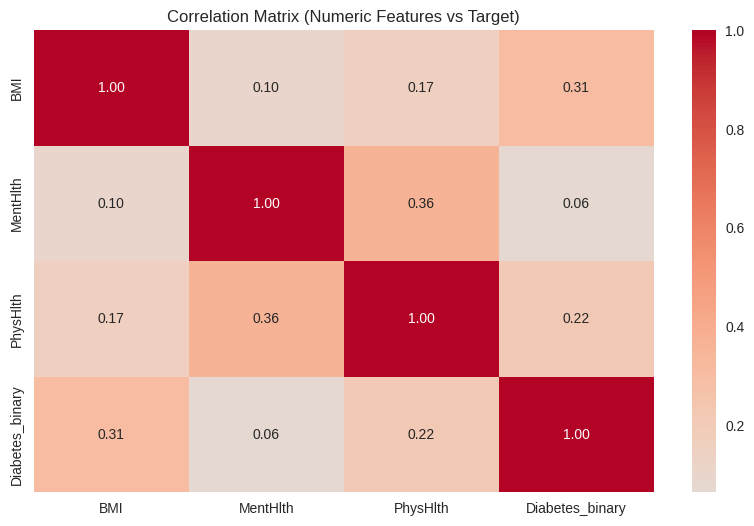

Selected Numeric Features (|corr| > 0.05): ['BMI', 'MentHlth', 'PhysHlth']


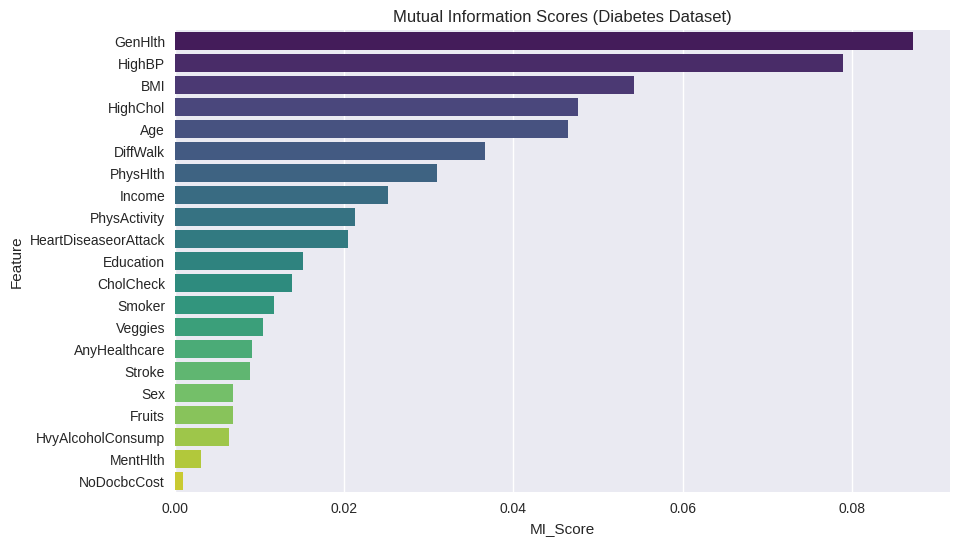

Final Selected Features (Top 10 by MI): ['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'PhysHlth', 'Income', 'PhysActivity', 'HeartDiseaseorAttack']


In [ ]:
# Define features & target


target = "Diabetes_binary"
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']
categorical_cols = [col for col in df.columns if col not in numeric_cols + [target]]

X = df.drop(columns=[target])
y = df[target]

# Correlation for numeric features
plt.figure(figsize=(10,6))
corr_matrix = df[numeric_cols + [target]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric Features vs Target)")
plt.show()

selected_numeric = corr_matrix[target].abs()[corr_matrix[target].abs() > 0.05].index.tolist()
if target in selected_numeric:
    selected_numeric.remove(target)

print("Selected Numeric Features (|corr| > 0.05):", selected_numeric)

# Mutual Information for all features
mi_scores = mutual_info_classif(X, y, discrete_features="auto", random_state=42)
mi_df = pd.DataFrame({"Feature": X.columns, "MI_Score": mi_scores})
mi_df = mi_df.sort_values(by="MI_Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="MI_Score", y="Feature", data=mi_df, hue="Feature",dodge=False, palette="viridis",legend=False)
plt.title("Mutual Information Scores (Diabetes Dataset)")
plt.show()

# --Select top features ---
selected_features = mi_df["Feature"].tolist()[:10]
print("Final Selected Features (Top 10 by MI):", selected_features)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features and target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE / oversampling only on training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#  Check new balance
print("Before:", y_train.value_counts())
print("After:", y_train_res.value_counts())




Before: Diabetes_binary
1    28077
0    27168
Name: count, dtype: int64
After: Diabetes_binary
1    28077
0    28077
Name: count, dtype: int64


#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Baseline Test Accuracy: 0.7269

Classification Report (Baseline):
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      6792
           1       0.71      0.77      0.74      7020

    accuracy                           0.73     13812
   macro avg       0.73      0.73      0.73     13812
weighted avg       0.73      0.73      0.73     13812



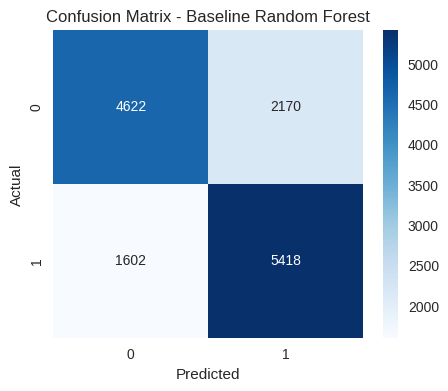

In [ ]:
#traine
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base.fit(X_train, y_train)

# Predictions
y_pred_rf_base = rf_base.predict(X_test)

# Evaluation
acc_rf_base = accuracy_score(y_test, y_pred_rf_base)
print(f"Baseline Test Accuracy: {acc_rf_base:.4f}")
print("\nClassification Report (Baseline):\n", classification_report(y_test, y_pred_rf_base))

# Confusion Matrix
cm_rf_base = confusion_matrix(y_test, y_pred_rf_base)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_base, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Random Forest")
plt.show()

In [ ]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=30,          # number of random parameter combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train, y_train)
print("Best Parameters Found:", rf_random.best_params_)

# Best tuned model
best_rf = rf_random.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters Found: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': None, 'bootstrap': True}



Tuned Test Accuracy: 0.7459

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      6792
           1       0.73      0.80      0.76      7020

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.74     13812
weighted avg       0.75      0.75      0.75     13812



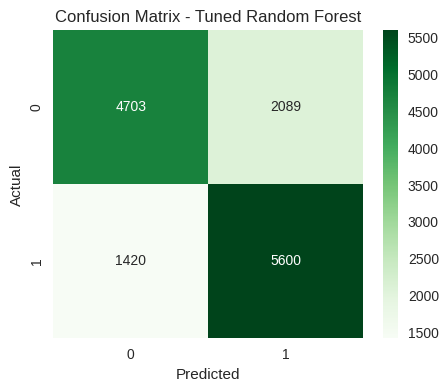

In [ ]:
y_pred_rf_tuned = best_rf.predict(X_test)
acc_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"\nTuned Test Accuracy: {acc_rf_tuned:.4f}")
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix - Tuned
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

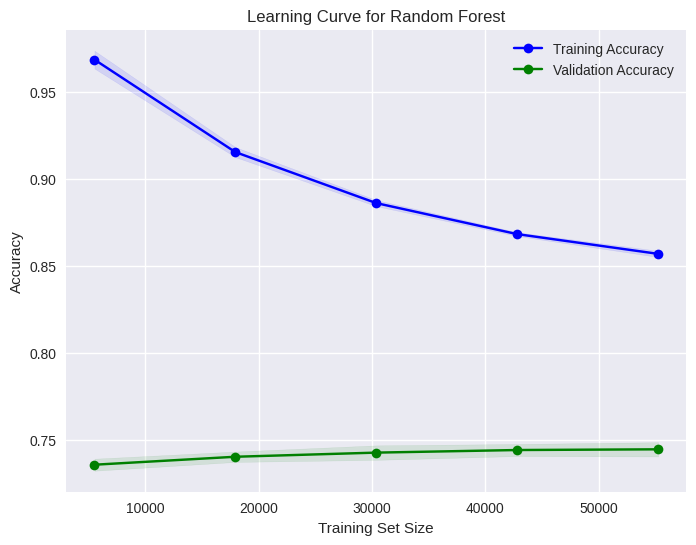

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have X, y (your features and labels)
# and have split or preprocessed them.

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("\nCross-validation scores:", np.round(cv_scores_rf, 4))
print(f"Mean CV Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")


Cross-validation scores: [0.7541 0.7401 0.7499 0.7434 0.7454]
Mean CV Accuracy: 0.7466 ± 0.0049


In [ ]:
#add to result
model_results.append({
    'Model': 'Random Forest',
    'Test Accuracy': acc_rf_tuned,
    'CV Mean Accuracy': cv_scores_rf.mean(),
    'CV Std': cv_scores_rf.std()
})